# Encoder-Decoder Analysis

### Model Architecture

In [48]:
report_file = '/Users/bking/IdeaProjects/LanguageModelRNN/experiment_results/encdec_noing15_6k_trV_200_512_04drb/encdec_noing15_6k_trV_200_512_04drb.json'
log_file = '/Users/bking/IdeaProjects/LanguageModelRNN/experiment_results/encdec_noing15_6k_trV_200_512_04drb/encdec_noing15_6k_trV_200_512_04drb_logs.json'

import json
import matplotlib.pyplot as plt
with open(report_file) as f:
    report = json.loads(f.read())
with open(log_file) as f:
    logs = json.loads(f.read())
print'Encoder: \n\n', report['architecture']['encoder']
print'Decoder: \n\n', report['architecture']['decoder']

Encoder: 

nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> output]
  (1): nn.LookupTable
  (2): nn.Dropout(0.400000)
  (3): nn.LSTM(200 -> 512)
  (4): nn.Dropout(0.400000)
}
Decoder: 

nn.gModule


### Perplexity on Each Dataset

In [49]:
print('Train Perplexity: ', report['train_perplexity'])
print('Valid Perplexity: ', report['valid_perplexity'])
print('Test Perplexity: ', report['test_perplexity'])

('Train Perplexity: ', 31.727393439486)
('Valid Perplexity: ', 44.894794722518)
('Test Perplexity: ', 46.800850181676)


### Loss vs. Epoch

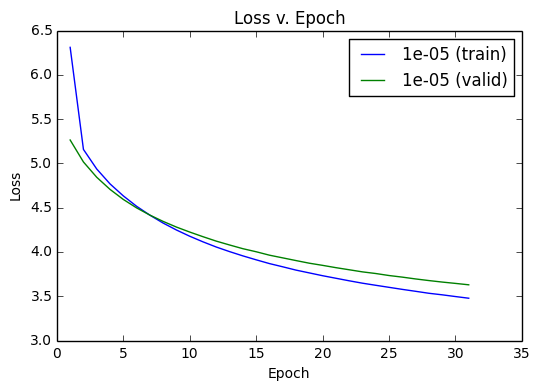

In [50]:
%matplotlib inline
for k in logs.keys():
    plt.plot(logs[k][0], logs[k][1], label=str(k) + ' (train)')
    plt.plot(logs[k][0], logs[k][2], label=str(k) + ' (valid)')
plt.title('Loss v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Perplexity vs. Epoch

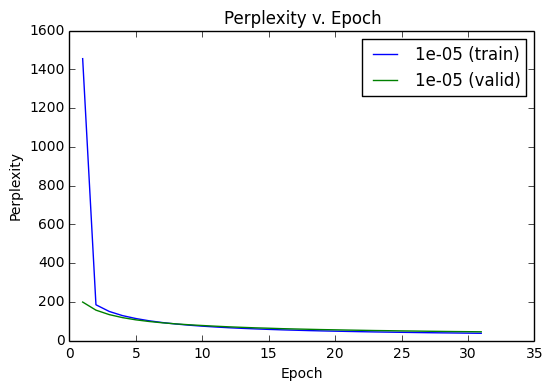

In [51]:
%matplotlib inline
for k in logs.keys():
    plt.plot(logs[k][0], logs[k][3], label=str(k) + ' (train)')
    plt.plot(logs[k][0], logs[k][4], label=str(k) + ' (valid)')
plt.title('Perplexity v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Perplexity')
plt.legend()
plt.show()

### Euclidean Distances (mean) vs. Epoch

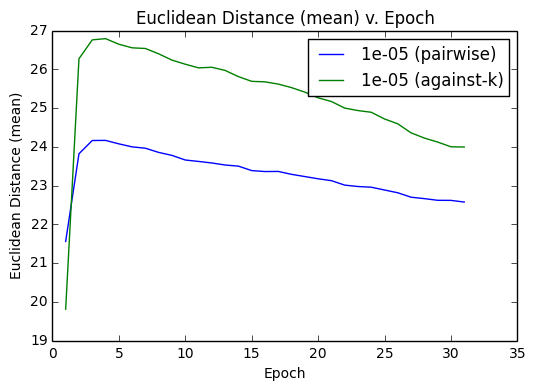

In [52]:
%matplotlib inline
for k in logs.keys():
    plt.plot(logs[k][0], logs[k][5], label=str(k) + ' (pairwise)')
    plt.plot(logs[k][0], logs[k][9], label=str(k) + ' (against-k)')
plt.title('Euclidean Distance (mean) v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Euclidean Distance (mean)')
plt.legend()
plt.show()

### Euclidean Distances (std-dev) vs. Epoch

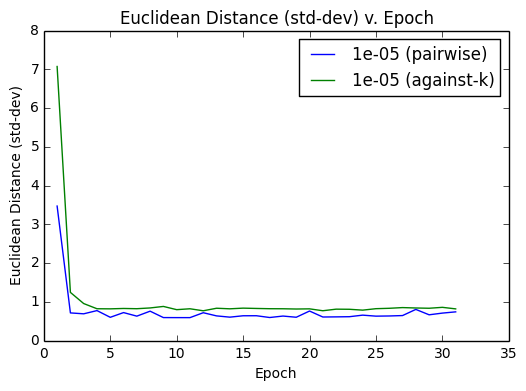

In [53]:
%matplotlib inline
for k in logs.keys():
    plt.plot(logs[k][0], logs[k][6], label=str(k) + ' (pairwise)')
    plt.plot(logs[k][0], logs[k][10], label=str(k) + ' (against-k)')
plt.title('Euclidean Distance (std-dev) v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Euclidean Distance (std-dev)')
plt.legend()
plt.show()

### Cosine Distances (mean) vs. Epoch

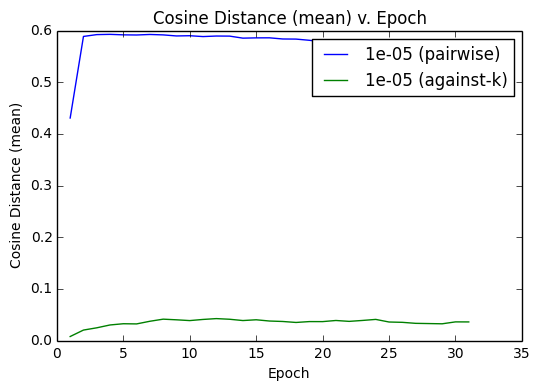

In [54]:
%matplotlib inline
for k in logs.keys():
    plt.plot(logs[k][0], logs[k][7], label=str(k) + ' (pairwise)')
    plt.plot(logs[k][0], logs[k][11], label=str(k) + ' (against-k)')
plt.title('Cosine Distance (mean) v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Cosine Distance (mean)')
plt.legend()
plt.show()

### Cosine Distances (std-dev) vs. Epoch

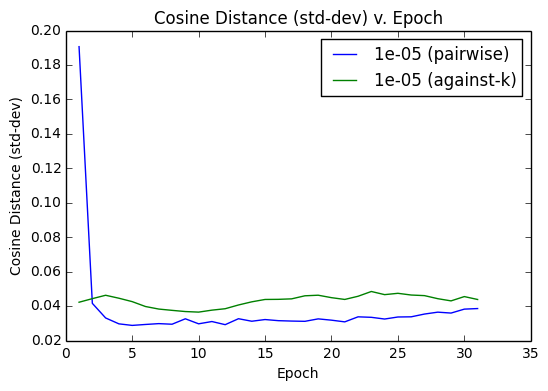

In [55]:
%matplotlib inline
for k in logs.keys():
    plt.plot(logs[k][0], logs[k][8], label=str(k) + ' (pairwise)')
    plt.plot(logs[k][0], logs[k][12], label=str(k) + ' (against-k)')
plt.title('Cosine Distance (std-dev) v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Cosine Distance (std-dev)')
plt.legend()
plt.show()

### Generations

In [56]:
def print_sample(sample, best_bleu=None):
    enc_input = ' '.join([w for w in sample['encoder_input'].split(' ') if w != '<pad>'])
    gold = ' '.join([w for w in sample['gold'].split(' ') if w != '<mask>'])
    print('Input: '+ enc_input + '\n')
    print('Gend: ' + sample['generated'] + '\n')
    print('True: ' + gold + '\n')
    if best_bleu is not None:
        cbm = ' '.join([w for w in best_bleu['best_match'].split(' ') if w != '<mask>'])
        print('Closest BLEU Match: ' + cbm + '\n')
        print('Closest BLEU Score: ' + str(best_bleu['best_score']) + '\n')
    print('\n')
    

In [57]:
for i, sample in enumerate(report['train_samples']):
    print_sample(sample, report['best_bleu_matches_train'][i] if 'best_bleu_matches_train' in report else None)

Input:  easy cheesy taco bake

Gend:  <beg> <step> first 1 tablespoon ginger in a small bowl in a skillet as over low heat . mix shimmering , drop , salt , sugar

True:  preheat oven to 350 <step> brown beef in skillet & add taco seasoning . cook as directed on seasoning packet <step> spray an <end>



Input:  edamame - miso tuna salad sandwiches

Gend:  <beg> 1 . i . in a bowl , mix all ingredients and just . <step> <step> in a small saucepan , layer hot cream ,

True:  mix tuna , edamame , sesame chile oil , miso , scallions , chile , salt , and pepper in a bowl ; serve on



Input:  orange & molasses grilled pork chops

Gend:  <beg> sift 2 . in a bowl until filo the flavor dissolve sides for 1 / 2 up milk and set aside . <step> add the

True:  combine all brine ingredients , except chops , in a large saucepot and bring to a boil . let cool . <end>



Input:  easy authentic guacamole

Gend:  <beg> boil milk boil and adjust in . <step> prepare vegetables and cook for most fine . reduc

In [58]:
for i, sample in enumerate(report['valid_samples']):
    print_sample(sample, report['best_bleu_matches_valid'][i] if 'best_bleu_matches_valid' in report else None)

Input:  5 - minute healthy strawberry frozen yogurt

Gend:  <beg> 1 . in pie skillet , heat the - bottomed open 5 and cook to cook . <step> bring a translucent over a 8 to

True:  add the frozen strawberries , agave nectar ( or honey ) , yogurt and lemon juice to the <end>



Input:  coffee cake in a mug with cinnamon oatmeal <UNK> topping

Gend:  <beg> combine core : in a medium bowl . combine the steak peppers , salt , and yellow . <step> add one mixture whites . sandwich

True:  place 1 tablespoon of room temperature butter in mug . if cold , place in microwave <end>



Input:  french fry stuffed chili enchiladas

Gend:  <beg> jar pie and soaked with a or bowl . <step> be by sides and corn . pour together pastry in center between curry as if

True:  preheat oven and bake french fries as directed on bag . <step> take your flour tortillas and heat <end>



Input:  pizza <UNK> breadsticks

Gend:  <beg> put , combine and onion in a large pot . add green lengthwise , black and blanch pas

In [59]:
for i, sample in enumerate(report['test_samples']):
    print_sample(sample, report['best_bleu_matches_test'][i] if 'best_bleu_matches_test' in report else None)

Input:  smoked salmon , avocado , dill and parsley mayo sandwich

Gend:  <beg> to make the upper of pork sort and shortening to cool a salmon until well temperature hours completely . warm are except . <step> in

True:  mash the lemon juice and avocado with dill and parsley mayo . spoon over a slice of bread and <end>



Input:  fancy hot dogs

Gend:  <beg> combine first first ingredients except . <step> 2 dry in a paper small sized ( from in the bottomed until smooth are low off halves

True:  <step> 1 melt butter in a large skillet ( cast iron works well for this purpose <end>



Input:  healthy oatmeal cookies

Gend:  <beg> recipe a large pot of boiling water with several adjust . <step> bring to simmer sauce , mix to a boil and tofu aside to

True:  preheat oven to 350 degrees . in a medium bowl , whisk together flours and baking powder ; set aside . <step> in <end>



Input:  mexican hummus

Gend:  <beg> preheat oven to 400 degrees . <step> fry the coriander , olive oil in a small

### BLEU Analysis

In [60]:
def print_bleu(blue_struct):
    print 'Overall Score: ', blue_struct['score'], '\n'
    print '1-gram Score: ', blue_struct['components']['1']
    print '2-gram Score: ', blue_struct['components']['2']
    print '3-gram Score: ', blue_struct['components']['3']
    print '4-gram Score: ', blue_struct['components']['4']

In [61]:
# Training Set BLEU Scores
print_bleu(report['train_bleu'])

Overall Score:  0 

1-gram Score:  19.2
2-gram Score:  2.8
3-gram Score:  0.8
4-gram Score:  0


In [62]:
# Validation Set BLEU Scores
print_bleu(report['valid_bleu'])

Overall Score:  0 

1-gram Score:  18.1
2-gram Score:  2.4
3-gram Score:  0
4-gram Score:  0


In [63]:
# Test Set BLEU Scores
print_bleu(report['test_bleu'])

Overall Score:  0 

1-gram Score:  21.2
2-gram Score:  3.6
3-gram Score:  0.4
4-gram Score:  0


In [64]:
# All Data BLEU Scores
print_bleu(report['combined_bleu'])

Overall Score:  0 

1-gram Score:  19.5
2-gram Score:  2.9
3-gram Score:  0.4
4-gram Score:  0


### N-pairs BLEU Analysis

This analysis randomly samples 1000 pairs of generations/ground truths and treats them as translations, giving their BLEU score. We can expect very low scores in the ground truth and high scores can expose hyper-common generations

In [65]:
# Training Set BLEU n-pairs Scores
print_bleu(report['n_pairs_bleu_train'])

Overall Score:  2.66 

1-gram Score:  25.4
2-gram Score:  3.9
3-gram Score:  1.1
4-gram Score:  0.4


In [66]:
# Validation Set n-pairs BLEU Scores
print_bleu(report['n_pairs_bleu_valid'])

Overall Score:  0 

1-gram Score:  32.5
2-gram Score:  6.1
3-gram Score:  0.7
4-gram Score:  0


In [67]:
# Test Set n-pairs BLEU Scores
print_bleu(report['n_pairs_bleu_test'])

Overall Score:  3.22 

1-gram Score:  29.3
2-gram Score:  5.6
3-gram Score:  1.4
4-gram Score:  0.5


In [68]:
# Combined n-pairs BLEU Scores
print_bleu(report['n_pairs_bleu_all'])

Overall Score:  2.38 

1-gram Score:  29.3
2-gram Score:  5.2
3-gram Score:  1
4-gram Score:  0.2


In [69]:
# Ground Truth n-pairs BLEU Scores
print_bleu(report['n_pairs_bleu_gold'])

Overall Score:  11.34 

1-gram Score:  25.9
2-gram Score:  12.5
3-gram Score:  8
4-gram Score:  6.4


### Alignment Analysis

This analysis computs the average Smith-Waterman alignment score for generations, with the same intuition as N-pairs BLEU, in that we expect low scores in the ground truth and hyper-common generations to raise the scores

In [70]:
print 'Average (Train) Generated Score: ', report['average_alignment_train']
print 'Average (Valid) Generated Score: ', report['average_alignment_valid']
print 'Average (Test) Generated Score: ', report['average_alignment_test']
print 'Average (All) Generated Score: ', report['average_alignment_all']
print 'Average Gold Score: ', report['average_alignment_gold']

Average (Train) Generated Score:  10.8444444444
Average (Valid) Generated Score:  9.97777777778
Average (Test) Generated Score:  11.5777777778
Average (All) Generated Score:  10.8965517241
Average Gold Score:  24.1172413793
